# Importing Packages

In [26]:
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from cleantext import clean
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from datetime import datetime, timedelta
warnings.filterwarnings("ignore")

# Reading the Dataset

In [27]:
df=pd.read_csv('vaccination_tweets.csv')
hashes=df.copy()
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1344800580741574656,нσℓℓүαηη,"From MI,VT,FL",#Wife👫#booknerd 📚#HospitalPharmacyVeteran🏩🤍#Mi...,2015-12-30 22:35:57,768,2945,14014,False,2021-01-01 00:20:18,#HappyNewYearsEve received my #first #dose of ...,"['HappyNewYearsEve', 'first', 'dose', 'PfizerB...",Twitter for iPad,0,1,False
2650,1344781844839972867,Free Malaysia Today,Malaysia,Free and Independent #FMTNews Telegram: https:...,2010-01-05 16:17:15,166605,1,0,False,2020-12-31 23:05:51,This opens the way for regulators worldwide to...,"['FMTNews', 'WHO', 'Vaccine']",Twitter Web App,0,0,False
2651,1344781623749959682,Monica #WashYourHands,"Dublin City, Ireland",Nurse 💉 MBA student 📙 Mediocre wine aficionado...,2018-05-11 09:33:52,88,607,1441,False,2020-12-31 23:04:58,First dose of #PfizerBioNTech vaccine received...,"['PfizerBioNTech', 'CovidVaccine']",Twitter for iPhone,0,1,False
2652,1344779534030274561,UMaravia,Lancaster University,"Doctoral research: organ transplantation, vacc...",2017-09-29 20:14:11,76,180,1091,False,2020-12-31 22:56:40,💉✅⛔️To vax or not to vax?\n☪️Check out my late...,NaN,Twitter Web App,2,7,False


## Preprocessing and Normalizing the Tweets:

### Stop_Words:

In [28]:
stop_words=set(stopwords.words('English'))
l=[]
for i in range(len(df)):
    x=df['text'][i].split()
    for j in x:
        if j in stop_words:
            x.remove(j)
    l.append(' '.join(x))

### Punctuations:

In [29]:
for i in range(len(l)):
    l[i] = l[i].translate(str.maketrans('', '', string.punctuation))

### Upper case to Lower Case:

In [30]:
for i in range(len(l)):
    l[i]=l[i].lower().strip()

### Removing Emojis:

In [31]:
for i in range(len(l)):
     l[i]=clean(l[i], no_emoji=True)

### Tokenisation and Lemmatisation:

In [32]:
for i in range(len(l)):
    l[i]=l[i].split()

In [33]:
lemmatizer = WordNetLemmatizer()
for i in range(len(l)):
    for j in range(len(l[i])):
        l[i][j]=lemmatizer.lemmatize(l[i][j]) 

In [34]:
tweets=[]
for i in l:
       tweets.append(' '.join(i))
df['text']=tweets
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folk said daikon paste could treat cytoki...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while world been wrong side history year hopef...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,fact immutable senator even youre ethically st...,NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain me why need vaccine borisjohnson matth...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1344800580741574656,нσℓℓүαηη,"From MI,VT,FL",#Wife👫#booknerd 📚#HospitalPharmacyVeteran🏩🤍#Mi...,2015-12-30 22:35:57,768,2945,14014,False,2021-01-01 00:20:18,happynewyearseve received first dose pfizerbio...,"['HappyNewYearsEve', 'first', 'dose', 'PfizerB...",Twitter for iPad,0,1,False
2650,1344781844839972867,Free Malaysia Today,Malaysia,Free and Independent #FMTNews Telegram: https:...,2010-01-05 16:17:15,166605,1,0,False,2020-12-31 23:05:51,this open way regulator worldwide quickly appr...,"['FMTNews', 'WHO', 'Vaccine']",Twitter Web App,0,0,False
2651,1344781623749959682,Monica #WashYourHands,"Dublin City, Ireland",Nurse 💉 MBA student 📙 Mediocre wine aficionado...,2018-05-11 09:33:52,88,607,1441,False,2020-12-31 23:04:58,first dose pfizerbiontech vaccine received the...,"['PfizerBioNTech', 'CovidVaccine']",Twitter for iPhone,0,1,False
2652,1344779534030274561,UMaravia,Lancaster University,"Doctoral research: organ transplantation, vacc...",2017-09-29 20:14:11,76,180,1091,False,2020-12-31 22:56:40,to vax not vax check my latest article publish...,NaN,Twitter Web App,2,7,False


## Demographic Analysis:

### Editing the date column for further analysis:

In [35]:
for i in range(len(df)):
    df['user_created'][i]=df['user_created'][i][:4]

In [36]:
dic={}
for i in df['user_created']:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
dic=dict(sorted(dic.items(), key = lambda x: x[0], reverse = False))
print(dic)

{'2007': 10, '2008': 67, '2009': 471, '2010': 232, '2011': 259, '2012': 191, '2013': 183, '2014': 146, '2015': 143, '2016': 86, '2017': 134, '2018': 128, '2019': 243, '2020': 356, '2021': 5}


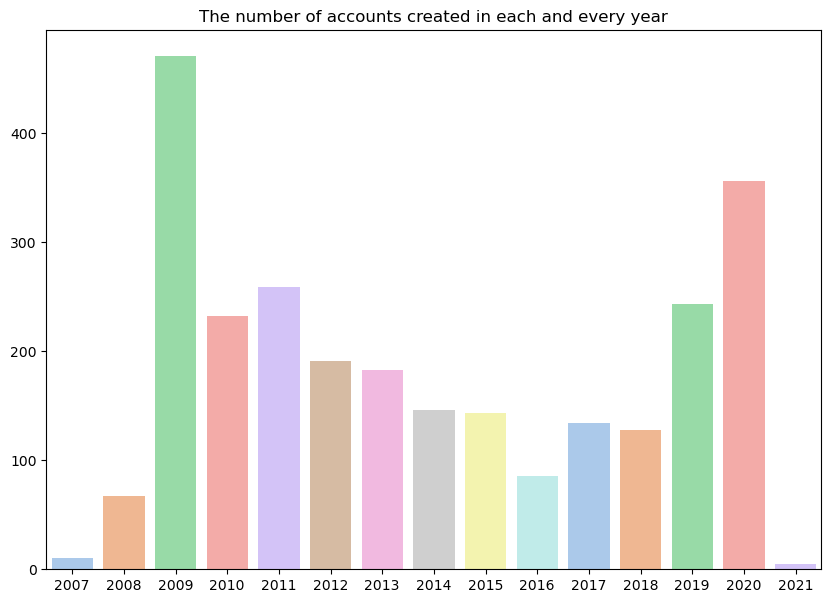

In [37]:
fig, ax = plt.subplots(figsize=(10, 7))
colors = sns.color_palette("pastel")
sns.barplot(x=list(dic.keys()),y=list(dic.values()),ax=ax,palette=colors)
plt.title('The number of accounts created in each and every year')
plt.show()

### Analysing the time interval in which the users were most active:

#### split 1: 00:00:00 - 03:59:59
#### split 2: 04:00:00 - 07:59:59
#### split 3: 08:00:00 - 11:59:59
#### split 4: 12:00:00 - 15:59:59
#### split 5: 16:00:00 - 19:59:59
#### split 6: 20:00:00 - 23:59:59

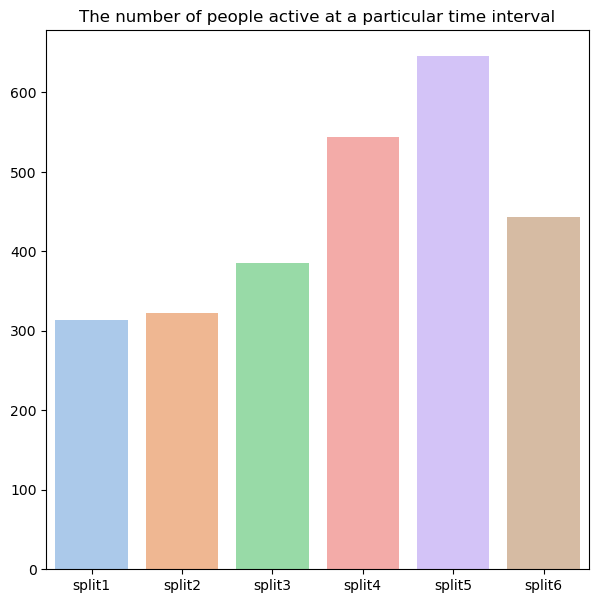

In [38]:
time_list=[]
for i in df['date']:
    x,y=i.split()
    time_list.append(y)
datetime_list = [datetime.strptime(time, '%H:%M:%S') for time in time_list]
start_time = datetime.strptime('00:00:00', '%H:%M:%S')
splits = []
for i in range(6):
    end_time = start_time + timedelta(hours=4)
    split_times = [time.strftime('%H:%M:%S') for time in datetime_list if start_time <= time < end_time]
    splits.append(split_times)
    start_time = end_time
split=['split'+str(i+1) for i in range(len(splits))]
count=[]
for i in range(len(splits)):
    count.append(len(splits[i]))
fig, ax = plt.subplots(figsize=(7, 7))
colors = sns.color_palette("pastel")
sns.barplot(x=split,y=count,ax=ax,palette=colors)
plt.title('The number of people active at a particular time interval')
plt.show()

### Top 10 Hastags:

In [39]:
hashtag=[]
for i in hashes['text']:
    string=re.findall(r'#\w+',i)
    hashtag.append(string)
hashes['hashtags']=hashtag

In [40]:
all_hash=[]
dic={}
hashtag=[]
count=[]
for i in hashes['hashtags']:
    if len(i)>=1:
        for j in i:
            all_hash.append(j)
for i in all_hash:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
dic=dict(sorted(dic.items(), key = lambda x: x[1], reverse = True))
for key,value in dic.items():
    hashtag.append(key)
    count.append(value)

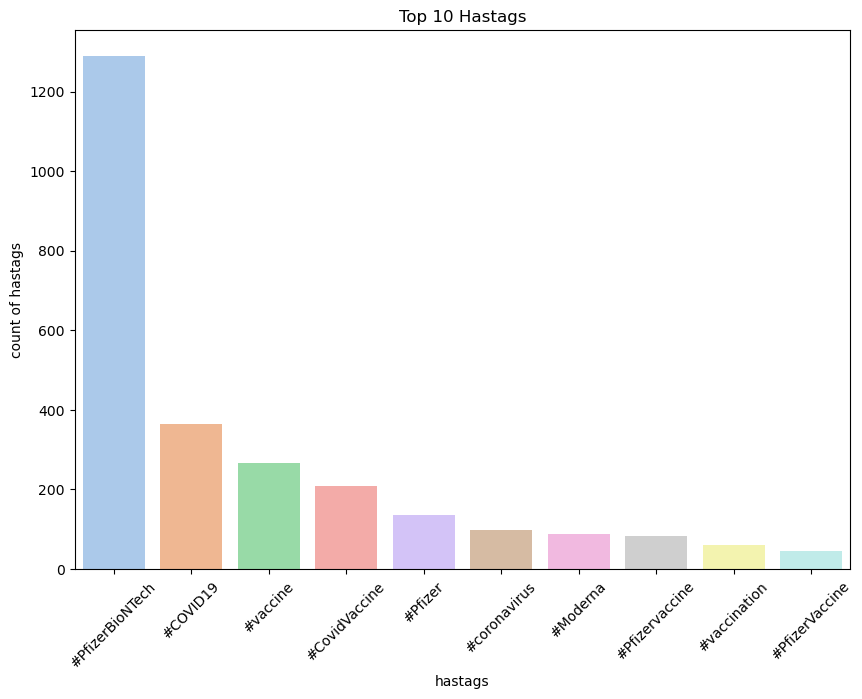

In [41]:
fig,ax= plt.subplots(figsize=(10, 7))
colors = sns.color_palette("pastel")
sns.barplot(x=hashtag[:10],y=count[:10],ax=ax,palette=colors)
plt.xlabel('hastags')
plt.ylabel('count of hastags')
plt.title('Top 10 Hastags')
plt.xticks(rotation=45)
plt.show()

### Top 10 liked tweets:

In [69]:
sorted_df = df.sort_values(by='user_favourites',ascending=False).reset_index().drop(['index'],axis=1)
sorted_df[:10]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_sentiment
0,1338156006627397632,#MasksSaveLives🌊Vulcan🖖Writer✒Mom💁,"Montreal, QC, Canada",Scientist by training. Writer by profession. W...,2012,2825,1335,924667,False,2020-12-13 16:17:08,jeremysale nytimes apparently truck escorted u...,NaN,Twitter for Android,0,3,False,1
1,1343515934036783106,BrindusaB,NaN,NaN,2012,17417,3693,629087,False,2020-12-28 11:15:34,wuhanviruspandemic vaccine pfizerbiontech deli...,"['WuhanVirusPandemic', 'Vaccines', 'PfizerBioN...",Twitter for Android,0,0,False,1
2,1346965502099398662,YVETTE “FUCK THOSE FUCKERS”,NaN,👸🏻 🇵🇷 https://t.co/MCVQBNx1gl #supportPuertoRico,2009,2743,3698,519461,False,2021-01-06 23:42:55,in news i'm getting second pfizer vaccination ...,"['PfizerBioNTech', 'CovidVaccine', 'believesci...",Twitter for iPhone,1,7,False,0
3,1341208587759198208,Dr N Patel 🌏,NaN,"Nation Comes First, Nature and Animal Lover ...",2011,78705,4039,443856,False,2020-12-22 02:27:00,shahm80071092 so far pfizerbiontech moderna va...,"['PfizerBioNTech', 'Moderna']",Twitter Web App,4,5,False,0
4,1340770655856418816,Joanbeam3000,La Belle Province,"Be yourself, everyone else is already taken. ~...",2014,2597,4988,338447,False,2020-12-20 21:26:49,bonnielcarter mooreintheam i immediately thoug...,['PMJT'],Twitter Web App,0,5,False,0
5,1338890202845245446,Joanbeam3000,La Belle Province,"Be yourself, everyone else is already taken. ~...",2014,2598,4991,338348,False,2020-12-15 16:54:34,geoffreyknapper rosiebarton do not understand ...,['COVID19'],Twitter Web App,0,3,False,0
6,1338579784125845506,Joanbeam3000,La Belle Province,"Be yourself, everyone else is already taken. ~...",2014,2597,4988,338282,False,2020-12-14 20:21:04,fordnation odd verb choice there doug you on h...,NaN,Twitter Web App,0,7,False,1
7,1338599948884070402,Joanbeam3000,La Belle Province,"Be yourself, everyone else is already taken. ~...",2014,2597,4988,338282,False,2020-12-14 21:41:12,farandwide erinotoole michellerempel that remp...,NaN,Twitter Web App,0,4,False,0
8,1338590172523470848,Joanbeam3000,La Belle Province,"Be yourself, everyone else is already taken. ~...",2014,2597,4988,338282,False,2020-12-14 21:02:21,farandwide erinotoole michellerempel screensho...,['QP'],Twitter Web App,1,5,False,-1
9,1338587622214610946,Joanbeam3000,La Belle Province,"Be yourself, everyone else is already taken. ~...",2014,2597,4988,338282,False,2020-12-14 20:52:13,dwaincampbell unfortunately hansard not captur...,NaN,Twitter Web App,0,0,False,-1


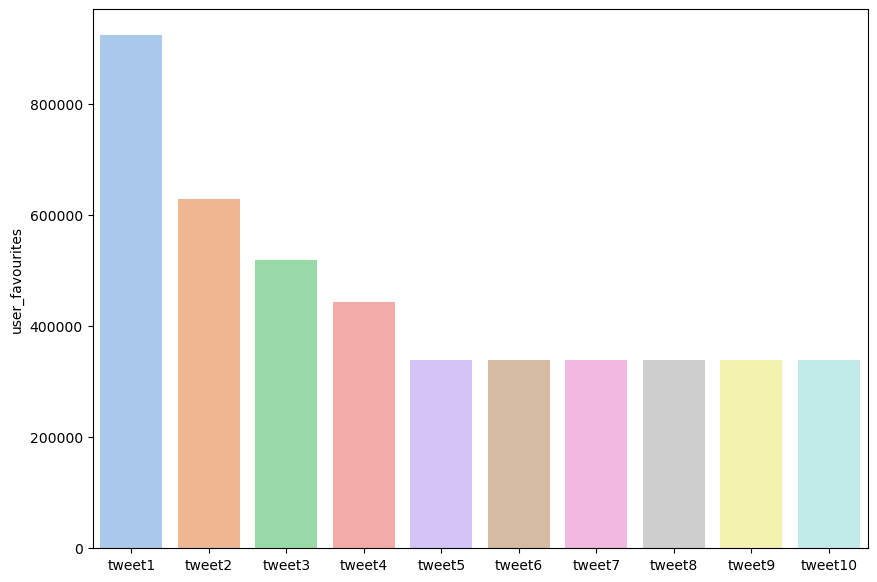

In [58]:
tweets=['tweet'+str(i+1) for i in range(10)]
counts=sorted_df['user_favourites'][:10]
fig,ax= plt.subplots(figsize=(10, 7))
colors = sns.color_palette("pastel")
sns.barplot(x=tweets,y=counts,ax=ax,palette=colors)
plt.show()

### Top 10 Influencers:

In [85]:
influencers={}
for i in range(len(df)):
    if df['user_name'][i] not in influencers:
        influencers[df['user_name'][i]]=df['user_followers'][i]
    else:
        influencers[df['user_name'][i]]+=df['user_followers'][i]
influencers=dict(sorted(influencers.items(), key = lambda x: x[1], reverse = True))
print(influencers)

{'The Hindu': 19704244, 'Gulf News': 18922461, 'New Straits Times': 16123398, 'Khaleej Times': 15658982, 'CGTN': 13714928, 'AFP News Agency': 11726074, 'ABP News': 10741934, 'IndiaToday': 5450165, 'DNA': 4423936, 'The Daily Star': 3427343, 'CNBC-TV18': 3398205, 'Business Today': 3227914, 'DD News': 3085027, 'RT': 3031954, 'Business Standard': 2042730, 'Senator Shehu Sani': 1772291, 'India TV': 1491144, 'FinancialXpress': 1396938, 'MTV Lebanon News': 1303565, 'The Quint': 1218616, 'The National': 1033382, 'Zeinobia is at home 🏡': 1015076, 'Lovin Dubai | لوڤن دبي': 1014955, 'moneycontrol': 991719, 'The Jerusalem Post': 987642, 'حسن سجواني 🇦🇪 Hassan Sajwani': 960994, 'Arab News': 933226, 'The Epoch Times': 895317, 'LatestLY': 738491, 'Free Malaysia Today': 663847, 'SAfm news': 584749, 'Getty Images News': 570540, 'ECOMNEWSMED': 558661, 'Daily News Egypt': 556863, 'IANS Tweets': 538878, 'Ramesh Bala': 512759, 'The Peninsula Qatar': 511464, 'Marc Siegel MD': 509927, 'The New Indian Express'

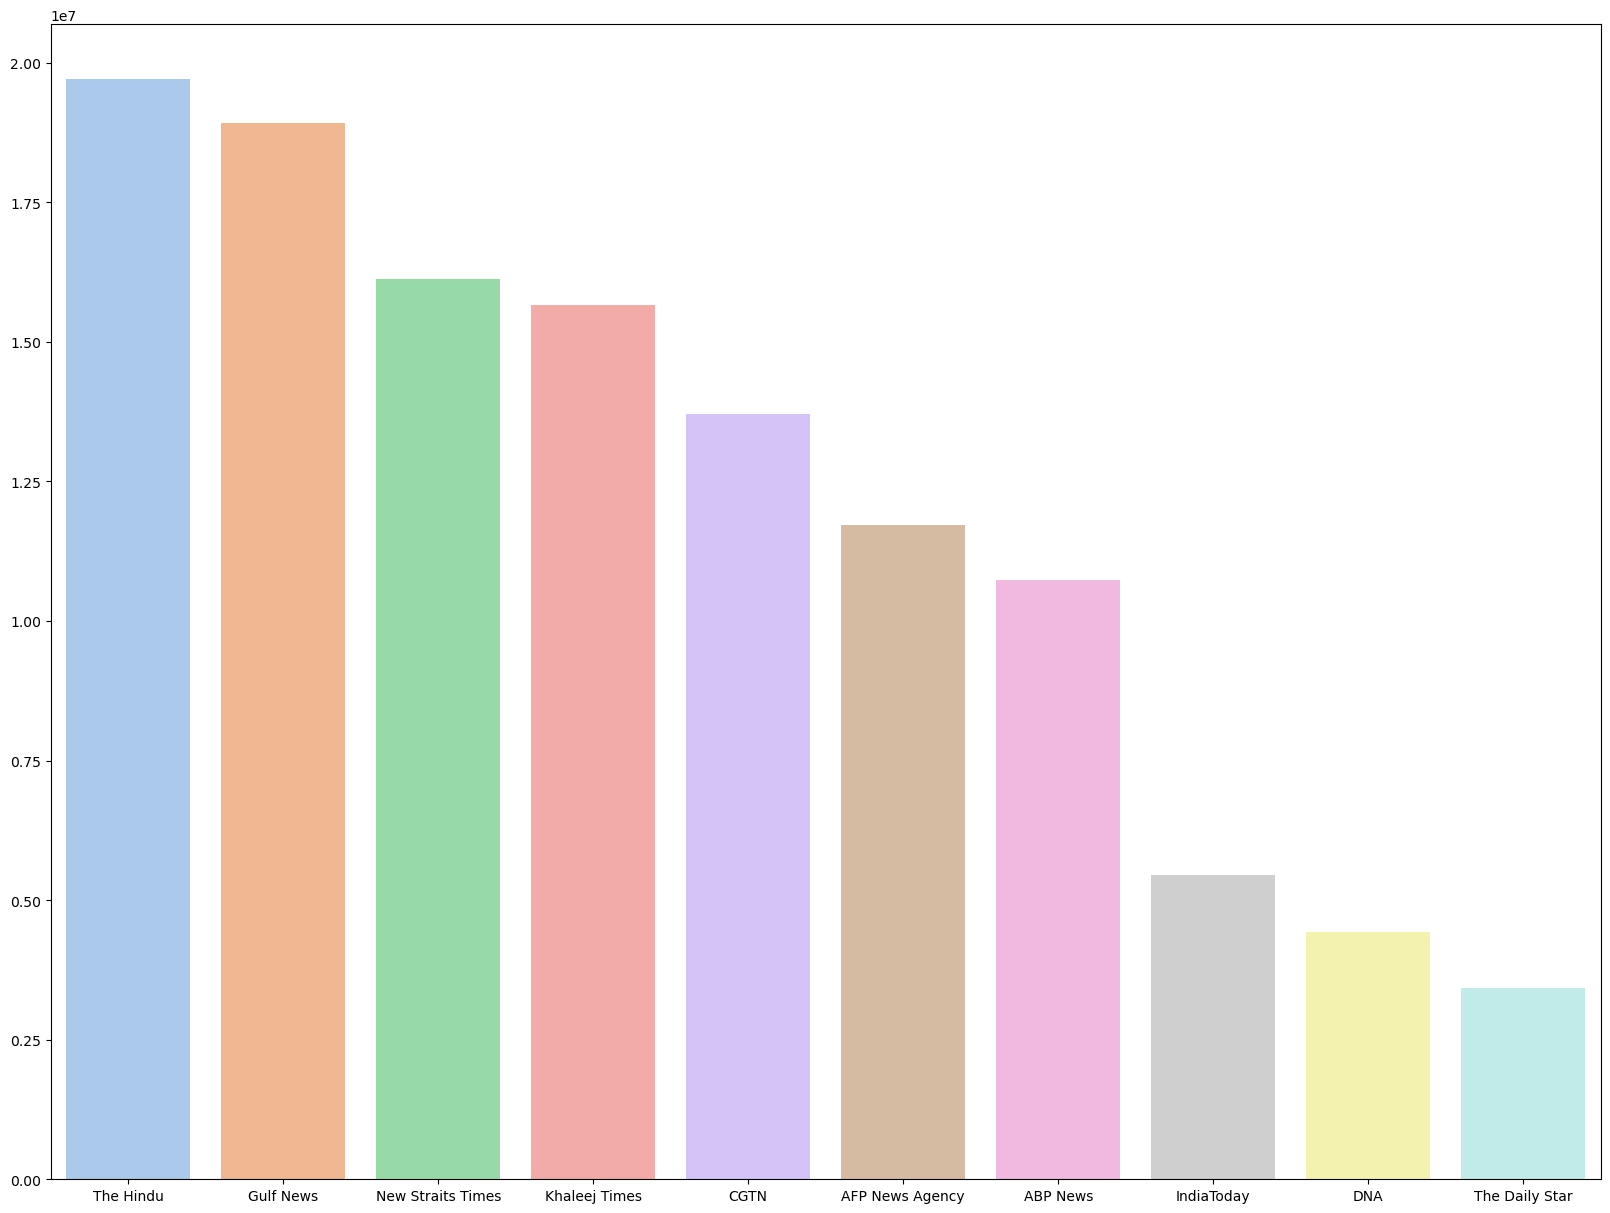

In [84]:
fig,ax= plt.subplots(figsize=(20, 15))
colors = sns.color_palette("pastel")
sns.barplot(x=list(influencers.keys())[:10],y=list(influencers.values())[:10],ax=ax,palette=colors)
plt.show()

## Assigning Sentiments to texts:

In [42]:
compound_score=[]
sentiment=[]
s=SentimentIntensityAnalyzer()
for i in df['text']:
    dic=s.polarity_scores(i)
    compound_score.append(dic['compound'])
for i in compound_score:
    if(i>0):
        sentiment.append(1)
    elif(i<0):
        sentiment.append(-1)
    else:
        sentiment.append(0)
df['text_sentiment']=sentiment
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009,405,1692,3247,False,2020-12-20 06:06:44,same folk said daikon paste could treat cytoki...,['PfizerBioNTech'],Twitter for Android,0,0,False,1
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009,834,666,178,False,2020-12-13 16:27:13,while world been wrong side history year hopef...,NaN,Twitter Web App,1,1,False,-1
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,1
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008,49165,3933,21853,True,2020-12-12 20:23:59,fact immutable senator even youre ethically st...,NaN,Twitter Web App,446,2129,False,0
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020,152,580,1473,False,2020-12-12 20:17:19,explain me why need vaccine borisjohnson matth...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1344800580741574656,нσℓℓүαηη,"From MI,VT,FL",#Wife👫#booknerd 📚#HospitalPharmacyVeteran🏩🤍#Mi...,2015,768,2945,14014,False,2021-01-01 00:20:18,happynewyearseve received first dose pfizerbio...,"['HappyNewYearsEve', 'first', 'dose', 'PfizerB...",Twitter for iPad,0,1,False,1
2650,1344781844839972867,Free Malaysia Today,Malaysia,Free and Independent #FMTNews Telegram: https:...,2010,166605,1,0,False,2020-12-31 23:05:51,this open way regulator worldwide quickly appr...,"['FMTNews', 'WHO', 'Vaccine']",Twitter Web App,0,0,False,0
2651,1344781623749959682,Monica #WashYourHands,"Dublin City, Ireland",Nurse 💉 MBA student 📙 Mediocre wine aficionado...,2018,88,607,1441,False,2020-12-31 23:04:58,first dose pfizerbiontech vaccine received the...,"['PfizerBioNTech', 'CovidVaccine']",Twitter for iPhone,0,1,False,0
2652,1344779534030274561,UMaravia,Lancaster University,"Doctoral research: organ transplantation, vacc...",2017,76,180,1091,False,2020-12-31 22:56:40,to vax not vax check my latest article publish...,NaN,Twitter Web App,2,7,False,0


### Positive, negative and neutral tweets by verified users and unverified users

#### 1 - Positive tweets
#### 0 - Neutral tweets
#### -1 - Negative tweets

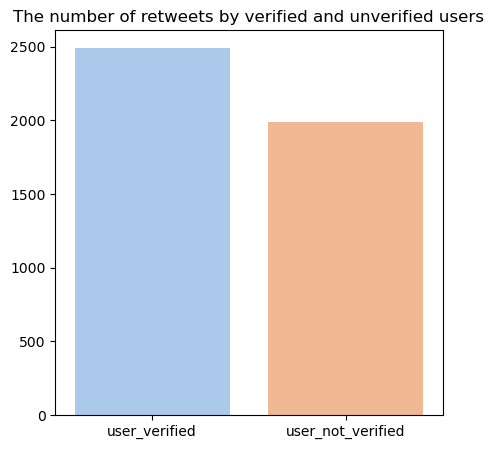

In [43]:
l=0
m=0
dic={}
for i in range(len(df)):
    if df['user_verified'][i] == True:
        l=l+df['retweets'][i]
    else:
        m=m+df['retweets'][i]  
dic['user_verified']=l
dic['user_not_verified']=m
fig, ax = plt.subplots(figsize=(5, 5))
colors = sns.color_palette("pastel")
sns.barplot(x=list(dic.keys()),y=list(dic.values()),ax=ax,palette=colors)
plt.title('The number of retweets by verified and unverified users')
plt.show()

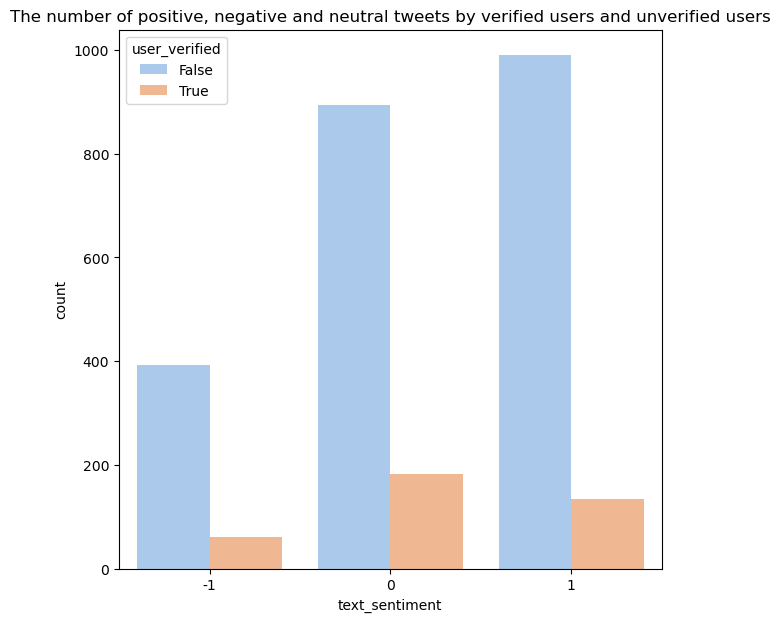

In [44]:
fig, ax = plt.subplots(figsize=(7, 7))
colors = sns.color_palette("pastel")
sns.countplot(x=df['text_sentiment'],ax=ax,palette=colors,hue=df['user_verified'])
plt.title('The number of positive, negative and neutral tweets by verified users and unverified users')
plt.show()

## Sentiment Analysis:

## Feature Extraction

In [45]:
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(df['text'])

## Classification:

### Logistic Regression classifier:

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(vector,df['text_sentiment'], test_size=0.25, random_state=0)

In [47]:
LRclassifier = LogisticRegression(random_state = 0)
LRclassifier.fit(xtrain, ytrain)
y_pred = LRclassifier.predict(xtest)

<Axes: >

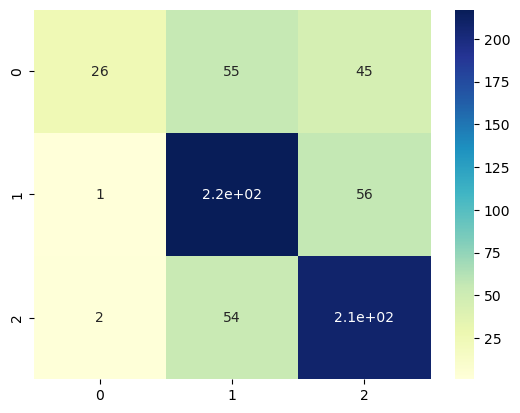

In [48]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True,cmap="YlGnBu")

### SVM Classifier:

In [49]:
SVMclassifier = SVC(kernel='rbf')
SVMclassifier.fit(xtrain, ytrain)
y_pred = SVMclassifier.predict(xtest)

<Axes: >

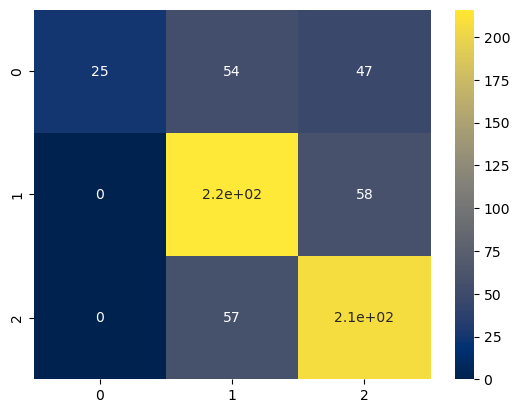

In [50]:
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True,cmap="cividis")